In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
path = '/content/drive/MyDrive/dataset/archive.zip'

In [ ]:
zip_ref   = zipfile.ZipFile(path, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_path = '/content/train_zip/train/'
test_path = '/content/test_zip/test/'

In [ ]:
labels_train = []
labels_test = []

path_train = []
path_test = []

In [ ]:
for filename in os.listdir(train_path):
  #Menyortir file dengan format jpg
  if (filename.split('.')[1]=='jpg'):
    #mengambil nama depan file yang dipisahkan oleh "_" lalu dijadikan label
    labels_train.append(filename.split('_')[0])
    path_train.append(os.path.join(train_path, filename))

for filename in os.listdir(test_path):
  if (filename.split('.')[1]=='jpg'):
    labels_test.append(filename.split('_')[0])
    path_test.append(os.path.join(test_path, filename))

In [ ]:
#Unique: meringkas label yang sama
labels_train_unique = np.unique(np.array(labels_train))
labels_test_unique = np.unique(np.array(labels_test))

print(f'Label Training Dataset Buah: {labels_train_unique}')
print(f'Number of fileimage in dataset train: {len(path_train)}')
print(f'Label Validation Dataset Buah: {labels_test_unique}')
print(f'Number of fileimage in dataset test: {len(path_test)}')

Label Training Dataset Buah: ['apple' 'banana' 'mixed' 'orange']
Number of fileimage in dataset train: 240
Label Validation Dataset Buah: ['apple' 'banana' 'mixed' 'orange']
Number of fileimage in dataset test: 60


In [ ]:
X_train = []

for path in path_train:
    img = cv2.imread(path)    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    final_img =  cv2.resize(rgb_img, (50,50))
    X_train.append(final_img)
    
X_train = np.array(X_train)

In [ ]:
X_test = []

for path in path_test:
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_img = cv2.resize(rgb_img, (50,50))
    X_test.append(final_img)
    
X_test = np.array(X_test) 

In [ ]:
print(X_train.shape)
print(X_test.shape)

(240, 50, 50, 3)
(60, 50, 50, 3)


In [ ]:
fruits = {}

for i in range(len(labels_train_unique)):
  fruits[labels_train_unique[i]] = i
fruits

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [ ]:
temp_train = []
temp_test = []

for label in labels_train:
  temp_train.append(fruits.get(label))

for label in labels_test:
  temp_test.append(fruits.get(label))

print(f'Lenght of train data {len(temp_train)}')
print(f'Lenght of test data {len(temp_test)}')

Lenght of train data 240
Lenght of test data 60


In [ ]:
#kenapa 4? karena di dataset ini di ada 4 labels yaitu (orange, banana, apel, mixed) default type nya float32
y_train = tf.keras.utils.to_categorical(temp_train, 4)
y_test = tf.keras.utils.to_categorical(temp_test, 4)

In [ ]:
#mengubah tipe x_train, dan x_test menjadi float sesuai dengan y_train, y_test
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [ ]:
#Normalize
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (240, 50, 50, 3)
y_train shape: (240, 4)
X_test shape: (60, 50, 50, 3)
y_test shape: (60, 4)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
    ])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 11, 11, 32)       

In [ ]:
from tensorflow.keras.optimizers import Adam
optmizers = Adam(learning_rate=0.001)
model.compile(optimizer=optmizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs = 100, validation_data=(X_test, y_test), validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 1s 101ms/step - loss: 1.3655 - accuracy: 0.3073 - val_loss: 1.3192 - val_accuracy: 0.3750
Epoch 2/100
6/6 [==============================] - 0s 73ms/step - loss: 1.3113 - accuracy: 0.2865 - val_loss: 1.2642 - val_accuracy: 0.4375
Epoch 3/100
6/6 [==============================] - 0s 75ms/step - loss: 1.3418 - accuracy: 0.3021 - val_loss: 1.2752 - val_accuracy: 0.3750
Epoch 4/100
6/6 [==============================] - 0s 71ms/step - loss: 1.3032 - accuracy: 0.2969 - val_loss: 1.2962 - val_accuracy: 0.3125
Epoch 5/100
6/6 [==============================] - 0s 75ms/step - loss: 1.3122 - accuracy: 0.3073 - val_loss: 1.2980 - val_accuracy: 0.2708
Epoch 6/100
6/6 [==============================] - 0s 71ms/step - loss: 1.3127 - accuracy: 0.3490 - val_loss: 1.2845 - val_accuracy: 0.3125
Epoch 7/100
6/6 [==============================] - 0s 73ms/step - loss: 1.3168 - accuracy: 0.2656 - val_loss: 1.2756 - val_accuracy: 0.2500
Epoch 8/100
6/6 [==

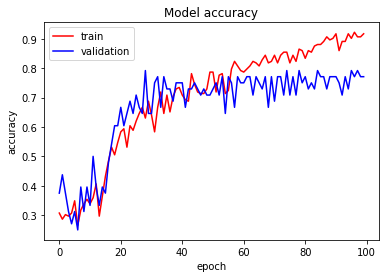

In [ ]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

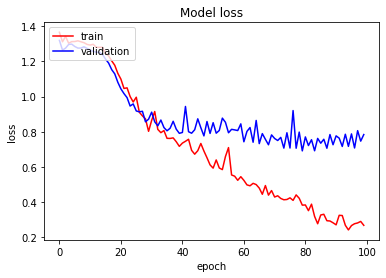

In [ ]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
score, accuracy = model.evaluate(X_test, y_test)
print('Test score achieved:', score)
print('Test accuracy achieved:', accuracy)

2/2 [==============================] - 0s 18ms/step - loss: 0.4954 - accuracy: 0.8000
Test score achieved: 0.495399534702301
Test accuracy achieved: 0.800000011920929


In [ ]:
pred = model.predict(X_test)

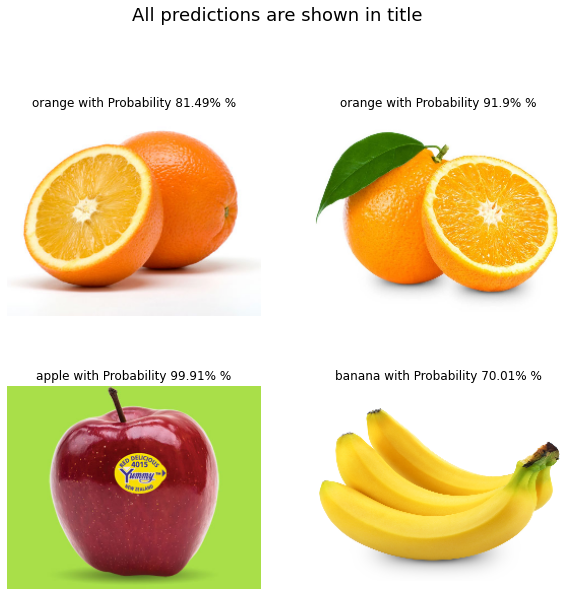

In [ ]:
fig, axs= plt.subplots(2,2, figsize=[10,10])
fig.subplots_adjust(hspace=.01)


count=0
for i in range(2):    
    for j in range(2):  
        
        img = cv2.imread(path_test[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = cv2.resize(img, (250,200))
        result = np.argsort(pred[count])[::-1]
        
        i_max = -1
        max_val = ""
        for (k,val) in enumerate(fruits.keys()):
            
            if(pred[count][k] > i_max):
                i_max = pred[count][k]
                max_val = val
        
        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"
            
        
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

lb=LabelBinarizer()
print('Evaluating Network...')
print(classification_report(y_test.argmax(axis=1),
	pred.argmax(axis=1), target_names= fruits))

Evaluating Network...
              precision    recall  f1-score   support

       apple       0.89      0.89      0.89        19
      banana       0.71      0.83      0.77        18
       mixed       0.00      0.00      0.00         5
      orange       0.80      0.89      0.84        18

    accuracy                           0.80        60
   macro avg       0.60      0.65      0.63        60
weighted avg       0.74      0.80      0.77        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pisang.jpg to pisang.jpg


In [ ]:
from PIL import Image

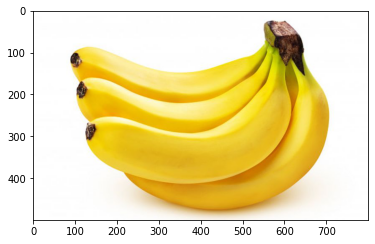

In [ ]:
image_testing = Image.open('/content/pisang.jpg')
plt.imshow(image_testing)
plt.show()

In [ ]:
image_testing=np.array(image_testing.resize((50,50))) / 255.0
image_testing.shape

(50, 50, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 50, 50, 3)


In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(fruits)

[[0. 1. 0. 0.]]
{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}
